# FIT5196  Assessment 3
#### Student Name: Armin Berger
#### Student ID: 26255367

Date: 10/11/2020

Version: 1.0

Environment: Python 3.7.6 and Jupyter notebook

Libraries used: 
* os (library used for interacting with operating systems)

* langid (library used for language identification ) 

* pandas (library used for dataframe maniulation and general wrangling)

* os (library used for reading in multiple file from the local os)

* shapely (library used for shape calculations)

* langid (library used to language identification)

* collections (library used to manipulate data collections)

* numpy as np (library used for mathematical operations)

* json (library used to work with json files)

* math (library used for various mathematical operations)

* tabula (library used for reading in pdf data, particularly tables)

* IPython.display (library used to read in html data)

* shapefile (library used for reading in shapefile data)

* datetime (library used to calculate time differences)

* xml.etree.ElementTree (library used to load xml files and turn them into dataframes)

# Import libraries 

Firstly, we will install and import all the required libraries.

### <span style="color:red"> IMPORTANT :
For installing libraries just uncomment the # pip install line and run it!

In [1]:
#  install library needed to read in pdf table data
# pip install tabula-py

In [2]:
#  install library needed to read in shape files
# pip install pyshp

In [1]:
# load the required libraries for this assignment 

import pandas as pd # used for dataframe maniulation and general wrangling

import os # used for reading in multiple file from the local os 

from shapely.geometry.polygon import Polygon # used for determining the location of a Point in space

from shapely.geometry import Point # used for determining the borders/oulines of a shape

import langid # used to language identification 

import collections # used to manipulate data collections

import numpy as np # used for mathematical operations

import re # used for regular expression

import json # used to work with json files

from datetime import timedelta # used to calculate time differences

import math # used for various mathematical operations

import tabula # used for reading in pdf data, particularly tables

from IPython.display import display_html # used to read in html data

import shapefile # used for reading in shapefile data

import xml.etree.ElementTree as ET # used to load xml files and turn them into dataframes

from sklearn import preprocessing

from sklearn.linear_model import LinearRegression # used for linear regression models

from matplotlib import pyplot as plt # used for plotting histograms and boxplots

from scipy import stats # used for box cox transformations

# Overview 

In this assignment we seek to read in an integrate data in different formats. The read in data includes:


- supermarkets.pdf
- shopingcenters.xlsx
- real_state.json
- hospitals.html
- a GTFS dataset of the Melbourne train system 

All of this data is realted to the features of a property listed by a real estate agency. We seek to determine important features of each property.

The final result of this integration of different data sources will be a data frame named 
all_data_df with the columns:

- Property_id
- lat
- lng
- addr_street
- suburb
- price
- property_type
- year
- bedrooms
- bathrooms
- parking_space
- Shopping_center_id
- Distance_to_sc
- Train_station_id
- Distance_to_train_station
- travel_min_to_CBD
- Transfer_flag
- Hospital_id
- Distance_to_hospital
- Supermarket_id
- Distance_to_supermaket

# <span style="color:blue"> 1. First Task - Data Integration

In this first task we integrate data in various formats and from various sources. All the requried relevant information is saved in the pandas dataframe all_data_df.

## 1.1 Read in real estate data in json and xml format, then merge the dataframes

In [2]:
# read in our  real estate data in json fromat
#json_data = json.load('real_state.json')
with open('real_state.json') as file:
  json_data = json.load(file)

# get idea of data in json file
json_data[0]


{'property_id': 32807,
 'lat': -37.752721,
 'lng': 145.016737,
 'addr_street': '45 Foley Avenue',
 'price': 12592000,
 'property_type': 'house',
 'year': 2015,
 'bedrooms': 2,
 'bathrooms': 1,
 'parking_space': 2}

In [5]:
# read in json file real_state.json and save it as a pandas dataframe
# this data frame contains basic information about the properties we are interested in
real_state_json_df = pd.read_json (r'real_state.json')

In [6]:
# display first 5 rows to get an idea of the structure and type of data
real_state_json_df.head()


,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,32807,-37.752721,145.016737,45 Foley Avenue,12592000,house,2015,2,1,2
1,15866,-37.735813,144.891327,9 Ross Street,11250000,house,2009,4,2,3
2,1968,-37.820721,144.848748,2/38 Millers Road,4620000,house,2014,2,2,1
3,1625,-37.817969,144.848232,10 Corrigan Avenue,12393000,house,2015,3,1,2
4,72970,-37.860689,145.255553,14 Thanos Court,9096000,house,2016,5,3,2


In [7]:
# check how many rows and columns the df has
real_state_json_df.shape


(1010, 10)

The read in json real estate data has 1010 properties and 10 characteristics so far, ranging from property_id to the number of parking_space. Outside of the proptery data in json format there is also more property data saved in xml format in the file real_state.xml. 

After reading that data in we will check its structure and see if it can be merged with the json property data.

In [8]:
# read in xml data file 
etree = ET.parse('real_state.xml')

# get the root of the file 
root = etree.getroot()

# list to save the name of all columns
column_names = []

# iterate throught the root
for child in root:
    
    # to append the name of each column
    column_names.append(child.tag) 
    
# save the the number of rows in the xml dataset
number_rows = len(root[1][:])

In [9]:
# get number of columns 
column_names_num = len(column_names)

In [10]:
# dict that saves all the property values 
# each key is a column value
dict_poperty = dict()

# iterate through the range of 'columns' values in the xml file
for index_column in range(column_names_num):
    
    # save each column name as a key in dict_poperty
    # now using list comprehension iterate through all the 'row' vaues and save them as a list to each key
    dict_poperty[column_names[index_column]] = [root[index_column][index_row].text for index_row in range(number_rows)]
    
# we turn the dict dict_poperty that saves all the property values into a pandas dataframe 
real_state_xml_df = pd.DataFrame(dict_poperty)      

In [11]:
# check final xml based dataframe
real_state_xml_df

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,75707,-37.89717102,145.09669499999998,13 Tamar Grove,5805000,house,2009,3,1,2
1,4529,-37.836378,144.86803,51 Graham Street,3663000,house,2010,3,1,2
2,11701,-37.709553,144.81866399999998,14 Augustines Way,6075000,house,2010,3,2,2
3,80109,-37.986888,145.160517,30 Putt Grove,9360000,house,2015,3,1,2
4,71200,-37.855115000000005,145.240708,18 Cloverlea Drive,9380000,house,2016,4,2,1
...,...,...,...,...,...,...,...,...,...,...
995,75475,-37.90480804,145.0589905,8 Park View Drive,13280000,house,2008,4,2,2
996,35863,-37.67968,145.03301499999998,13 Alfred Avenue,3740000,house,2014,3,1,1
997,10769,-37.793453,144.93223400000002,65 Barnett Street,4600000,house,2010,2,1,0
998,52251,-37.822352,145.00296699999998,128 Coppin Street,7660000,house,2009,2,1,0


Now we need to merge both dataframes. Before we can do that, it needs to be assessed if both dataframes have the same columns and data types. This condition is required to merge them

In [12]:
# check the data type of each column
real_state_xml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    1000 non-null   object
 1   lat            1000 non-null   object
 2   lng            1000 non-null   object
 3   addr_street    1000 non-null   object
 4   price          1000 non-null   object
 5   property_type  1000 non-null   object
 6   year           1000 non-null   object
 7   bedrooms       1000 non-null   object
 8   bathrooms      1000 non-null   object
 9   parking_space  1000 non-null   object
dtypes: object(10)
memory usage: 78.2+ KB


In [13]:
# check the data type of each column
real_state_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    1010 non-null   int64  
 1   lat            1010 non-null   float64
 2   lng            1010 non-null   float64
 3   addr_street    1010 non-null   object 
 4   price          1010 non-null   int64  
 5   property_type  1010 non-null   object 
 6   year           1010 non-null   int64  
 7   bedrooms       1010 non-null   int64  
 8   bathrooms      1010 non-null   int64  
 9   parking_space  1010 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 79.0+ KB


In [14]:
# since in the real_state_xml_df all column values are strings, we need to convert all columns containing numbers 
# to the float datatype 

real_state_xml_df['property_id'] = real_state_xml_df['property_id'].astype(int)

real_state_xml_df['lat'] = real_state_xml_df['lat'].astype(float)

real_state_xml_df['lng'] = real_state_xml_df['lng'].astype(float)

real_state_xml_df['price'] = real_state_xml_df['price'].astype(int)

real_state_xml_df['price'] = real_state_xml_df['price'].astype(int)

real_state_xml_df['year'] = real_state_xml_df['year'].astype(int)

real_state_xml_df['bedrooms'] = real_state_xml_df['bedrooms'].astype(int)

real_state_xml_df['bathrooms'] = real_state_xml_df['bathrooms'].astype(int)

real_state_xml_df['parking_space'] = real_state_xml_df['parking_space'].astype(int)

In [15]:
# check if all columns containing numbers were converted to the float datatype 
real_state_xml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    1000 non-null   int64  
 1   lat            1000 non-null   float64
 2   lng            1000 non-null   float64
 3   addr_street    1000 non-null   object 
 4   price          1000 non-null   int64  
 5   property_type  1000 non-null   object 
 6   year           1000 non-null   int64  
 7   bedrooms       1000 non-null   int64  
 8   bathrooms      1000 non-null   int64  
 9   parking_space  1000 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 78.2+ KB


In [16]:
# outer join the two dataframes, thus only saving unique rows 
all_data_df = pd.merge(real_state_json_df, real_state_xml_df, how = 'outer')

Using the info() command we can see that there are no null values in the entire data set. Moreove, we can check the data type of each column.

In [17]:
# check the end result
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    1994 non-null   int64  
 1   lat            1994 non-null   float64
 2   lng            1994 non-null   float64
 3   addr_street    1994 non-null   object 
 4   price          1994 non-null   int64  
 5   property_type  1994 non-null   object 
 6   year           1994 non-null   int64  
 7   bedrooms       1994 non-null   int64  
 8   bathrooms      1994 non-null   int64  
 9   parking_space  1994 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 171.4+ KB


In [18]:
all_data_df.shape

(1994, 10)

In [19]:
# get an overview of the data distribution for each column
all_data_df.describe()

,property_id,lat,lng,price,year,bedrooms,bathrooms,parking_space
count,1994.000000,1994.000000,1994.000000,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000
mean,49054.882648,-37.806744,145.047708,8.893409e+06,2012.247743,3.223170,1.551153,1.581244
std,28195.469208,0.101080,0.137910,5.427988e+06,2.568247,0.762153,0.604915,0.777034
min,56.000000,-38.080040,144.631974,1.300000e+06,2005.000000,1.000000,1.000000,0.000000
25%,24944.000000,-37.871752,144.952619,5.238750e+06,2010.000000,3.000000,1.000000,1.000000
50%,48825.000000,-37.798731,145.035466,7.503000e+06,2012.000000,3.000000,1.000000,2.000000
75%,74015.250000,-37.732457,145.132073,1.080000e+07,2014.000000,4.000000,2.000000,2.000000
max,97113.000000,-37.570393,145.370073,4.046000e+07,2016.000000,5.000000,3.000000,3.000000


In [20]:
# Check if all properties are unique and there are no duplicate property_ids
len(all_data_df.property_id.unique())

1974

We only have 1974 unique property_ids despite having 1994 property_ids. Thus we can expect duplicate ids. We need to locate them and remove one of each duplicate.

In [21]:
# using the .duplicated function we identify all rows with duplicate property_id values
duplicate_ids = all_data_df[all_data_df.duplicated(['property_id'], keep=False)]
duplicate_ids

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
7,69057,-37.865430,145.032474,30 Glendearg Grove,30030000,house,2010,4,2,0
9,21723,-37.743334,144.954353,1/2 Bellevue Street,9008000,house,2013,3,2,2
13,43844,-37.710924,145.090617,52 Nepean Street,7238000,house,2014,3,1,1
14,13790,-37.753856,144.928140,125 Primrose Street,5985000,house,2012,2,1,2
16,35863,-37.679680,145.033015,13 Alfred Avenue,3740000,house,2014,3,1,1
17,10769,-37.793453,144.932234,65 Barnett Street,4600000,house,2010,2,1,0
18,52251,-37.822352,145.002967,128 Coppin Street,7660000,house,2009,2,1,0
19,29715,-37.763690,145.001654,22 Darebin Road,10260000,house,2014,2,1,0
67,28314,-37.795040,144.977337,47 Leicester Street,21930000,house,2014,3,2,1
68,28314,-37.795040,144.977337,47 Leicester Street,21930000,house,2014,3,2,1


In [22]:
# there are 40 duplicates, now we need to find which of these can be eliminated
duplicate_ids.shape

(40, 10)

In [23]:
# now we need to check if there is a difference in the characteristics of each 
# duplicate property
duplicate_ids.sort_values(by = 'property_id', axis=0, ascending=True, inplace=False)

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
174,6628,-37.793762,144.831955,33 Benjamin Street,4108000,house,2009,2,1,0
173,6628,-37.793762,144.831955,33 Benjamin Street,4108000,house,2009,2,1,0
1991,10769,-37.793453,144.932234,65 Barnett Street,4600000,house,2010,2,1,0
17,10769,-37.793453,144.932234,65 Barnett Street,4600000,house,2010,2,1,0
14,13790,-37.753856,144.928140,125 Primrose Street,5985000,house,2012,2,1,2
1989,13790,-37.753856,144.928140,125 Primrose Street,5985000,house,2012,2,1,2
433,15776,-37.746558,144.882907,5 Damask Place,5535000,house,2009,3,2,2
432,15776,-37.746558,144.882907,5 Damask Place,5535000,house,2009,3,2,2
9,21723,-37.743334,144.954353,1/2 Bellevue Street,9008000,house,2013,3,2,2
1107,21723,-37.743334,144.954353,1/2 Bellevue Street,9008000,house,2013,3,2,2


After manual check for all duplicate property_id values we saw that the duplicate rows were identical, thus one of them can be removed.

In [24]:
# using the .drop_duplicates() function we drop all duplicate rows 
all_data_df.drop_duplicates( inplace = True, keep = 'last' )

In [25]:
# check if now only unique properties are left
all_data_df.shape


(1985, 10)

## 1.2 Determine the suburb of each property

To determine in which suburb each property is located we need to know the 'location' and boundaries of each suburb. This informationis provided to us in the folder vic_suburb_boundary. Using the techniques learned in tutorial, mainly the use of the shapefile library, we can calculate in which suburb a property is located.

In [26]:
# first we load in the shape information of the suburbs
# from the folder vic_suburb_boundary
# shapefile is now saved in info_suburb
info_suburbs = shapefile.Reader("vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp")

In [27]:
# each suburb in the metropolitan melbourne/geelong area and its characteristics 
# are stored in info_suburbs.records(), now we need to extract and store that information
info_suburbs.records()

[Record #0: ['6670', datetime.date(2011, 8, 31), None, 'VIC2615', datetime.date(2012, 4, 27), None, 'UNDERBOOL', '', '', 'G', None, '2'],
 Record #1: ['6671', datetime.date(2011, 8, 31), None, 'VIC1986', datetime.date(2012, 4, 27), None, 'NURRAN', '', '', 'G', None, '2'],
 Record #2: ['6672', datetime.date(2011, 8, 31), None, 'VIC2862', datetime.date(2012, 4, 27), None, 'WOORNDOO', '', '', 'G', None, '2'],
 Record #3: ['6673', datetime.date(2011, 8, 31), None, 'VIC734', datetime.date(2017, 8, 9), None, 'DEPTFORD', '', '', 'G', None, '2'],
 Record #4: ['6674', datetime.date(2011, 8, 31), None, 'VIC2900', datetime.date(2012, 4, 27), None, 'YANAC', '', '', 'G', None, '2'],
 Record #5: ['6405', datetime.date(2011, 8, 31), None, 'VIC1688', datetime.date(2012, 4, 27), None, 'MINIMAY', '', '', 'G', None, '2'],
 Record #6: ['6451', datetime.date(2011, 8, 31), None, 'VIC999', datetime.date(2012, 4, 27), None, 'GLEN FORBES', '', '', 'G', None, '2'],
 Record #7: ['6452', datetime.date(2011, 8, 31

In [28]:
## from the read in shapefile we need two sets of information
# firstly, the name, postcode and other characteristics of each suburb
# seconld, the dimensions and boundaries of each suburb (the actual shape)

# get the characteristics of each suburb
# now we need to convert the shapefile characteristics into a form from which data on 
# suburd characteristics can be easily accessed
# use list comprehension to store info_suburbs.records() in a list of lists
info_suburbs_list_of_lists = [item[:] for item in info_suburbs.records()]

# save all the possible column values
columns_info_suburbs = info_suburbs.fields[1:] 

# just keep the names of the fields
columns_info_suburbs_name =  [item[0] for item in columns_info_suburbs]

## After extracting all the suburb information we save it in a dataframe.

# save susburb info in dataframe called info_suburbs_df
info_suburbs_df = pd.DataFrame(info_suburbs_list_of_lists, columns = columns_info_suburbs_name)

In [29]:
# check how our newly constructed data frame looks like
# show the header of the dataframe
info_suburbs_df.head()

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7
0,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,,,G,None,2
1,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,,,G,None,2
2,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,,,G,None,2
3,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,,,G,None,2
4,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,,,G,None,2


In [30]:
# after getting the information on the characteristics of each suburb we need to 
# get information of the actual shape of each suburb
info_suburbs_shape = info_suburbs.shapes()
#info_suburbs_shape

Shapes: [<shapefile.Shape object at 0x7fce56616fd0>, <shapefile.Shape object at 0x7fce56616ed0>, <shapefile.Shape object at 0x7fce56613610>, <shapefile.Shape object at 0x7fce566130d0>, <shapefile.Shape object at 0x7fce56613290>, <shapefile.Shape object at 0x7fce56611f50>, <shapefile.Shape object at 0x7fce56430250>, <shapefile.Shape object at 0x7fce56430550>, <shapefile.Shape object at 0x7fce56430290>, <shapefile.Shape object at 0x7fce56613450>, <shapefile.Shape object at 0x7fce566166d0>, <shapefile.Shape object at 0x7fce56616090>, <shapefile.Shape object at 0x7fce56616350>, <shapefile.Shape object at 0x7fce56616250>, <shapefile.Shape object at 0x7fce56616390>, <shapefile.Shape object at 0x7fce56616750>, <shapefile.Shape object at 0x7fce566163d0>, <shapefile.Shape object at 0x7fce52c8ef50>, <shapefile.Shape object at 0x7fce56147f90>, <shapefile.Shape object at 0x7fce56801f10>, <shapefile.Shape object at 0x7fce56801e90>, <shapefile.Shape object at 0x7fce56801f50>, <shapefile.Shape object

In [31]:
# using list comprehension we turn the Polygon information of each shape into
# a list of shape dimensions 
info_suburbs_shape = [Polygon(x.points) for x in info_suburbs.shapes()]

In [32]:
# assign suburb shapes to column 'suburb_dimensions'
info_suburbs_df['suburb_dimensions'] = info_suburbs_shape

In [33]:
# check new column
info_suburbs_df.head()

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,suburb_dimensions
0,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,,,G,None,2,"POLYGON ((141.74552399 -35.07228701, 141.74552..."
1,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,,,G,None,2,"POLYGON ((148.668767 -37.39571245, 148.6687620..."
2,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,,,G,None,2,"POLYGON ((142.92287999 -37.97885997, 142.90449..."
3,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,,,G,None,2,"POLYGON ((147.82335712 -37.66000897, 147.82312..."
4,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,,,G,None,2,"POLYGON ((141.279783 -35.99858911, 141.2798853..."


In [34]:
# we need a function to determine in which suburb a property is
# the function calc_suburbs() determines whether the lon lag coordinates of a property
# are contained in any suburb
def calc_suburbs(lat, lng):
    
    # save property coordinates in a tuple
    prop_loc = Point(lng, lat)
    
    # give default value to suburb name
    name = 'not available'
    
    # iterate through all possible suburbs a poperty could be ins
    for item, data in info_suburbs_df.iterrows():
        
        # if the property coordinates are contained within the dimensions of a suburb 
        if data['suburb_dimensions'].contains(prop_loc):
            
            # then save the value of VIC_LOCA_2, the column that contains the suburbs name
            name_sub = data['VIC_LOCA_2']
            
            # save on the name in sting format
            name = name_sub.title()
            
    # return name of suburb in string format
    return name


In [35]:
# uisng the calculate the calc_suburbs() function find the in which suburb a property is
# located and save the id of that suburb in a column called 'suburb'
all_data_df['suburb'] = all_data_df.apply(lambda row: calc_suburbs(row['lat'],row['lng']),axis=1)

In [36]:
# check if new suburb column looks like it's supposed to
all_data_df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb
0,32807,-37.752721,145.016737,45 Foley Avenue,12592000,house,2015,2,1,2,Preston
1,15866,-37.735813,144.891327,9 Ross Street,11250000,house,2009,4,2,3,Niddrie
2,1968,-37.820721,144.848748,2/38 Millers Road,4620000,house,2014,2,2,1,Brooklyn
3,1625,-37.817969,144.848232,10 Corrigan Avenue,12393000,house,2015,3,1,2,Brooklyn
4,72970,-37.860689,145.255553,14 Thanos Court,9096000,house,2016,5,3,2,Boronia


Now we have succefully determined the suburb of each property.

## 1.3 Determine closest shopping center and distance to it from each property

In [37]:
# read in data about shopping center location using .read_excel() function
# checked syntax in pandas documentation 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
shopping_center_location = pd.read_excel('shopingcenters.xlsx', index_col = 0)

In [38]:
# check columns and rows of shopping_center_location dataframe
shopping_center_location.shape

(119, 3)

In [39]:
# Check if all (shopping_center ids are unique and there are no duplicates
len(shopping_center_location.sc_id.unique())


119

All shopping_center_locations are unique.

In [40]:
## IMPORTANT: this function reuses code from my assignment 2 to calaculate the 
# Euclidean distance between two points
# used ideas from stackoverflow.com (see link)
# https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
# https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula
# this function will be reused a lot to calaculate various distances

# general function to calculate distance between two points
# requires lat and lng coordinates of both points
def cal_distance(aim, prop):
    
    # save the coordinates required to calculate the distance 
    lat_1, long_1 = aim
    lat_2, long_2 = prop

    # save the radius of the earth in m
    radius = 6378000  
    phi_1 = math.radians(lat_1)
    phi_2 = math.radians(lat_2)

    # haversine calculations required to determine distance to nearest warehouse
    delta_phi = math.radians(lat_2 - lat_1)
    delta_lambda = math.radians(long_2 - long_1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # the distance in meters 
    meters = radius * c 
    
    # the distance in kilometers
    km = meters / 1000.0
    
    # rounding the meter and km output
    meters = round(meters, 0)
    km = round(km, 4)
    
    # return the final rounded distance to warehouse in km
    return int(meters)


In [41]:
## IMPORTANT: this methode reuses code from my assignment 2 to calaculate the 
# Euclidean distance of each shopping center


# to determine which shopping center is the closest to a property we need to calculate
# the Euclidean distance of each shopping center and then choose the shortest one

# create a function that calaculates the distance to the nearest shopping center and 
# returns the id of the shopping center
def compare_dist_shopping_center(prop_lat, prop_lon):
    
    # save property postion as tuple
    prop_cor = (prop_lat, prop_lon)
    
    # list of distances to shopping_center
    dist_shopping_center_list = []
    
    shopping_center_id_name = 'not available'
    
    # iterate through all shopping_center locations saved in 
    # the dataframe shopping_center_location
    for item, data in shopping_center_location.iterrows():
    
        ## First, save shopping_center locations
        # save location shopping_center as tuple (lon,lat)
        shopping_center_loc = (float(data['lat']), float(data['lng']))

        
        # calculate the distance from the propertyt to each shopping_center
        dist_to_shopping =  float(cal_distance(shopping_center_loc, prop_cor))

        # append calculated distance and ID of shopping center
        # to list dist_shopping_center_list
        dist_shopping_center_list.append((dist_to_shopping, data['sc_id']))

    
    # reverese sort the tuples in the list base on the frist value (distance)
    # in each value 
    dist_shopping_center_list.sort(key = lambda x: x[0])
    
    # return the first item of the list, which is the shopping_center with 
    # the shortest distance to the property
    
    shopping_center_id_name = dist_shopping_center_list[0][1]
    
    return shopping_center_id_name
 

In [42]:
# calculate the nearest shopping center to the property and save the id of that
# shopping center in the column 'Shopping_center_id' of all_data_df['Shopping_center_id']
all_data_df['Shopping_center_id'] = all_data_df.apply(lambda row: compare_dist_shopping_center(row['lat'],row['lng']),axis=1)

In [43]:
# function to determine the location of a shopping center based on its id
# this location is then later used to calculate the distance to the nearest shopping center
def get_shopping_loc(loc_id):
    
    # iterate through each row in the shopping_center_location
    for item, data in shopping_center_location.iterrows():
        
        # if the id of the closest shopping center is found in the shopping_center_location df
        if str(data['sc_id']) == str(loc_id):
            
            # the save its coordinates as a tuple 
            shopping_center_loc = (float(data['lat']), float(data['lng']))
            
            # return the coordinates in tuple form
            return shopping_center_loc
    

In [44]:
# save the shopping center coordinates in column shopping_center_loc
all_data_df['Shopping_loc'] = all_data_df.apply(lambda row: get_shopping_loc(row['Shopping_center_id']),axis=1)

In [45]:
# calculate the distance to the nearest shopping center using the cal_distance() function
# and then save the result in a new column called 'Distance_to_sc'
all_data_df['Distance_to_sc'] = all_data_df.apply(lambda row: cal_distance(row['Shopping_loc'],(row['lat'],row['lng'])),axis=1)

In [46]:
# drop the temporary column 'Shopping_loc' that was created for calculating
# the distance to the nearest shopping center
all_data_df.drop(['Shopping_loc'], axis = 1, inplace = True)

In [47]:
# check if the column was successfully dropped 
all_data_df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc
0,32807,-37.752721,145.016737,45 Foley Avenue,12592000,house,2015,2,1,2,Preston,SC_103,1958
1,15866,-37.735813,144.891327,9 Ross Street,11250000,house,2009,4,2,3,Niddrie,SC_082,1271
2,1968,-37.820721,144.848748,2/38 Millers Road,4620000,house,2014,2,2,1,Brooklyn,SC_033,685
3,1625,-37.817969,144.848232,10 Corrigan Avenue,12393000,house,2015,3,1,2,Brooklyn,SC_033,978
4,72970,-37.860689,145.255553,14 Thanos Court,9096000,house,2016,5,3,2,Boronia,SC_032,5831


## 1.4 Determine closest supermarket and distance to it from each property

In [48]:
# read in pdf data using the tabula.read_pdf() function
supermarket_dfs = tabula.read_pdf('supermarkets.pdf', pages='all')

In [49]:
# save single data frame
supermarket_df = supermarket_dfs[0]

# drop unwanted index column
supermarket_df.drop(supermarket_df.columns[0], axis=1, inplace=True)

In [50]:
# check the shape (number of columns)
supermarket_df.shape

(49, 4)

In [51]:
# Check if all supermarket_df ids are unique and there are no duplicates
len(supermarket_df.id.unique())

49

All supermarket ids are unique.

In [52]:
# to determine which supermarket is the closest to a property we need to calculate
# the Euclidean distance of each shopping center and then choose the shortest one

# create a function that calaculates the distance to the nearest supermarket and 
# returns the id of the supermarket
def compare_dist_supermarket(prop_lat, prop_lon):
    
    # save property postion as tuple
    prop_cor = (prop_lat, prop_lon)
    
    # list of distances to supermarket
    dist_supermarket_list = []
    
    # iterate through all supermarket locations saved in 
    # the dataframe supermarket_df
    for item, data in supermarket_df.iterrows():
    
        ## First, save supermarket locations
        # save location supermarket as tuple (lat,lng)
        supermarket_loc = (float(data['lat']), float(data['lng']))

        
        # calculate the distance from the propertyt to each supermarket
        dist_to_supermarket =  float(cal_distance(supermarket_loc, prop_cor))

        # append calculated distance and ID of supermarket
        # to list dist_supermarket_list
        dist_supermarket_list.append((dist_to_supermarket, data['id']))

    
    # reverese sort the tuples in the list base on the frist value (distance)
    # in each value 
    dist_supermarket_list.sort(key = lambda x: x[0])
    
    # return the first item of the list, which is the supermarket with 
    # the shortest distance to the property
    
    supermarket_id_name = dist_supermarket_list[0][1]
    
    return supermarket_id_name
 

In [53]:
# calculate the nearest supermarket to the property and save the id of that
# supermarket in the column 'Supermarket_id'
all_data_df['Supermarket_id'] = all_data_df.apply(lambda row: compare_dist_supermarket(row['lat'],row['lng']),axis=1)

In [54]:
# function to determine the location of a supermarket based on its id
# this location is then later used to calculate the distance to the nearest supermarket
def get_supermarket_loc(loc_id):
    
    # iterate through each row in the supermarket_df
    for item, data in supermarket_df.iterrows():
        
        # if the id of the closest supermarket is found in the supermarket_df
        if str(data['id']) == str(loc_id):
            
            # the save its coordinates as a tuple 
            supermarket_loc = (float(data['lat']), float(data['lng']))
            
            # return the coordinates in tuple form
            return supermarket_loc
    

In [55]:
# save the train_station coordinates in column supermarket_loc
all_data_df['supermarket_loc'] = all_data_df.apply(lambda row: get_supermarket_loc(row['Supermarket_id']),axis=1)

In [56]:
# calculate the distance to the nearest supermaket using the cal_distance() function
# and then save the result in a new column called 'Distance_to_supermaket'
all_data_df['Distance_to_supermaket'] = all_data_df.apply(lambda row: cal_distance(row['supermarket_loc'],(row['lat'],row['lng'])),axis=1)

In [57]:
# drop the temporary column 'supermarket_loc' that was created for calculating
# the distance to the nearest supermarket
all_data_df.drop(['supermarket_loc'], axis = 1, inplace = True)

In [58]:
# check if the column was successfully dropped 
all_data_df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Supermarket_id,Distance_to_supermaket
0,32807,-37.752721,145.016737,45 Foley Avenue,12592000,house,2015,2,1,2,Preston,SC_103,1958,S_030,3892
1,15866,-37.735813,144.891327,9 Ross Street,11250000,house,2009,4,2,3,Niddrie,SC_082,1271,S_049,4166
2,1968,-37.820721,144.848748,2/38 Millers Road,4620000,house,2014,2,2,1,Brooklyn,SC_033,685,S_049,6377
3,1625,-37.817969,144.848232,10 Corrigan Avenue,12393000,house,2015,3,1,2,Brooklyn,SC_033,978,S_049,6152
4,72970,-37.860689,145.255553,14 Thanos Court,9096000,house,2016,5,3,2,Boronia,SC_032,5831,S_024,2554


## 1.5 Determine closest hospital and distance to it from each property

In [59]:
# read in html data in table format using pd.read_html()
hospital_dfs = pd.read_html('hospitals.html')

# save singular dataframe 
hospital_df = hospital_dfs[0]

# drop uncessary index column
hospital_df.drop(hospital_df.columns[0], axis=1, inplace=True)

In [60]:
# check the shape (number of rows)
hospital_df.shape

(199, 4)

In [61]:
# Check if all hospitals are unique and there are no duplicate ids
len(hospital_df.id.unique())


199

In [62]:
# to determine which hospital is the closest to a property we need to calculate
# the Euclidean distance of each shopping center and then choose the shortest one

# create a function that calaculates the distance to the nearest hospital and 
# returns the id of the hospital
def compare_dist_hospital(prop_lat, prop_lon):
    
    # save property postion as tuple
    prop_cor = (prop_lat, prop_lon)
    
    # list of distances to hospital
    dist_hospital_list = []
    
    hospital_id_name = 'not available'
    
    # iterate through all hospital locations saved in 
    # the dataframe hospital_df
    for item, data in hospital_df.iterrows():
    
        ## First, save hospital locations
        # save location hospital as tuple (lat,lng)
        hospital_loc = (float(data['lat']), float(data['lng']))

        
        # calculate the distance from the propertyt to each hospital
        dist_to_hospital =  float(cal_distance(hospital_loc, prop_cor))

        # append calculated distance and ID of hospital
        # to list dist_hospital_list
        dist_hospital_list.append((dist_to_hospital, data['id']))

    
    # reverese sort the tuples in the list base on the frist value (distance)
    # in each value 
    dist_hospital_list.sort(key = lambda x: x[0])
    
    # return the first item of the list, which is the hospital with 
    # the shortest distance to the property
    
    hospital_id_name = dist_hospital_list[0][1]
    
    return hospital_id_name
 

In [63]:
# calculate the nearest hospital to the property and save the id of that
# hospital in the column 'Hospital_id' 
all_data_df['Hospital_id'] = all_data_df.apply(lambda row: compare_dist_hospital(row['lat'],row['lng']),axis=1)

In [64]:
# function to determine the location of a hospital based on its id
# this location is then later used to calculate the distance to the nearest hospital
def get_hospital_loc(loc_id):
    
    # iterate through each row in the hospital_df
    for item, data in hospital_df.iterrows():
        
        # if the id of the closest hospital is found in thr hospital_df
        if str(data['id']) == str(loc_id):
            
            # the save its coordinates as a tuple 
            hospital_loc = (float(data['lat']), float(data['lng']))
            
            # return the coordinates in tuple form
            return hospital_loc
    

In [65]:
# save the hospital coordinates in column hospital_loc
all_data_df['hospital_loc'] = all_data_df.apply(lambda row: get_hospital_loc(row['Hospital_id']),axis=1)

In [66]:
# calculate the distance to the nearest hospital using the cal_distance() function
# and then save the result in a new column called 'Distance_to_hospital'
all_data_df['Distance_to_hospital'] = all_data_df.apply(lambda row: cal_distance(row['hospital_loc'],(row['lat'],row['lng'])),axis=1)

In [67]:
# drop the temporary column 'hospital_loc' that was created for calculating
# the distance to the nearest hospital
all_data_df.drop(['hospital_loc'], axis = 1, inplace = True)

In [68]:
# check if the column was successfully dropped 
all_data_df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Supermarket_id,Distance_to_supermaket,Hospital_id,Distance_to_hospital
0,32807,-37.752721,145.016737,45 Foley Avenue,12592000,house,2015,2,1,2,Preston,SC_103,1958,S_030,3892,hospital_035,1378
1,15866,-37.735813,144.891327,9 Ross Street,11250000,house,2009,4,2,3,Niddrie,SC_082,1271,S_049,4166,hospital_184,1409
2,1968,-37.820721,144.848748,2/38 Millers Road,4620000,house,2014,2,2,1,Brooklyn,SC_033,685,S_049,6377,hospital_056,4503
3,1625,-37.817969,144.848232,10 Corrigan Avenue,12393000,house,2015,3,1,2,Brooklyn,SC_033,978,S_049,6152,hospital_056,4335
4,72970,-37.860689,145.255553,14 Thanos Court,9096000,house,2016,5,3,2,Boronia,SC_032,5831,S_024,2554,hospital_002,1253


## 1.6 Determine the closest train station and distance to it from each property

In [69]:
# read in text data and save it in a dataframe format
train_stations_df = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/stops.txt')

In [70]:
# check the columns of the new train station data frame
train_stations_df.shape

(218, 5)

In [71]:
# Check if all train_stations are unique and there are no ids
len(train_stations_df.stop_id.unique())


218

All train stations are unique.

In [72]:
# to determine which train_station is the closest to a property we need to calculate
# the Euclidean distance of each train_station and then choose the shortest one


# create a function that calaculates the distance to the nearest train_station and 
# returns the id of the train_station
def compare_dist_train_station(prop_lat, prop_lon):
    
    # save property postion as tuple
    prop_cor = (prop_lat, prop_lon)
    
    # list of distances to train_station
    dist_train_station_list = []
    
    # set default value for train station
    train_station_id_name = 0
    
    # iterate through all train_station locations saved in 
    # the dataframe train_station_df
    for item, data in train_stations_df.iterrows():
    
        ## First, save train_station locations
        # save location of train_station as tuple (lat,lng)
        train_station_loc = (float(data['stop_lat']), float(data['stop_lon']))
        
        # calculate the distance from the property to each train_station
        dist_to_train_station =  float(cal_distance(train_station_loc, prop_cor))

        # append calculated distance and ID of train_station
        # to list dist_train_station_list
        dist_train_station_list.append((dist_to_train_station, data['stop_id']))

    
    # reverese sort the tuples in the list base on the frist value (distance)
    # in each value 
    dist_train_station_list.sort(key = lambda x: x[0])
    
    # return the first item of the list, which is the train_station with 
    # the shortest distance to the property
    train_station_id_name = dist_train_station_list[0][1]
    
    return train_station_id_name
 

In [73]:
# calculate the nearest train_station to the property and save the id of that
# train_station in the column 'Train_station_id' 
all_data_df['Train_station_id'] = all_data_df.apply(lambda row: compare_dist_train_station(row['lat'],row['lng']),axis=1)

In [74]:
# function to determine the location of a train station based on its id
# this location is then later used to calculate
def get_train_station_loc(loc_id):
    
    # iterate through each row in the train_stations_df
    for item, data in train_stations_df.iterrows():
        
        # if the id of the closest train station is found in thr train_stations_df
        if str(data['stop_id']) == str(loc_id):
            
            # the save its coordinates as a tuple 
            train_station_loc = (float(data['stop_lat']), float(data['stop_lon']))
            
            # return the coordinates in tuple form
            return train_station_loc
        

In [75]:
# save the train_station coordinates in column train_station_loc
all_data_df['train_station_loc'] = all_data_df.apply(lambda row: get_train_station_loc(row['Train_station_id']),axis=1)

In [76]:
# calculate the distance to the nearest train station using the cal_distance() function
# and then save the result in a new column called 'Distance_to_train_station'
all_data_df['Distance_to_train_station'] = all_data_df.apply(lambda row: cal_distance(row['train_station_loc'],(row['lat'],row['lng'])),axis=1)

In [77]:
# drop the temporary column train_station_loc' that was created for calculating
# the distance to the nearest train station
all_data_df.drop(['train_station_loc'], axis = 1, inplace = True)

In [78]:
# check if the column was successfully dropped 
all_data_df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Supermarket_id,Distance_to_supermaket,Hospital_id,Distance_to_hospital,Train_station_id,Distance_to_train_station
0,32807,-37.752721,145.016737,45 Foley Avenue,12592000,house,2015,2,1,2,Preston,SC_103,1958,S_030,3892,hospital_035,1378,20014,1620
1,15866,-37.735813,144.891327,9 Ross Street,11250000,house,2009,4,2,3,Niddrie,SC_082,1271,S_049,4166,hospital_184,1409,20036,2899
2,1968,-37.820721,144.848748,2/38 Millers Road,4620000,house,2014,2,2,1,Brooklyn,SC_033,685,S_049,6377,hospital_056,4503,20022,2696
3,1625,-37.817969,144.848232,10 Corrigan Avenue,12393000,house,2015,3,1,2,Brooklyn,SC_033,978,S_049,6152,hospital_056,4335,20022,2453
4,72970,-37.860689,145.255553,14 Thanos Court,9096000,house,2016,5,3,2,Boronia,SC_032,5831,S_024,2554,hospital_002,1253,19870,2383


In [79]:
# check for non-null values
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1993
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   property_id                1985 non-null   int64  
 1   lat                        1985 non-null   float64
 2   lng                        1985 non-null   float64
 3   addr_street                1985 non-null   object 
 4   price                      1985 non-null   int64  
 5   property_type              1985 non-null   object 
 6   year                       1985 non-null   int64  
 7   bedrooms                   1985 non-null   int64  
 8   bathrooms                  1985 non-null   int64  
 9   parking_space              1985 non-null   int64  
 10  suburb                     1985 non-null   object 
 11  Shopping_center_id         1985 non-null   object 
 12  Distance_to_sc             1985 non-null   int64  
 13  Supermarket_id             1985 non-null   objec

## 1.7 Determine the average travel time from each properties closest train station to 'Flinders street' station

In this section we seek to get the average travel time (minutes) from the closest train station to the “Flinders street” station on weekdays (i.e. Monday-Friday) departing between 7 to 9 am. 

For example, if there are 3 trip departing from the closest train station to the Flinders street station on weekdays between 7-9am and each take 6, 7, and 8 minutes respectively, then the value of this column for then property should be (6+7+8)/3. 

If there are any direct transfers between the closest station and Flinders street station, only the average of direct transfers should be calculated .

In [80]:
## read in all avialable data on train schedules and save it in dataframe format

# read in the file trips.txt
train_trip_df = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/trips.txt')

# read in the file stop_times.txt
train_stop_times_df = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/stop_times.txt')

# read in the file shapes.txt
train_shapes_df = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/shapes.txt')

# read in the file routes.txt
train_routes_df = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/routes.txt')

# read in the file calendar.txt
train_calendar_df = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/calendar.txt')

Firstly, we will check each read in dataframe to see what information we have to work with.

In [81]:
# check columns and values 
train_trip_df.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


In [82]:
# check columns and values 
train_stop_times_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952


In [83]:
# check the number of train stops (stop_id)
len(set(train_stop_times_df['stop_id']))

218

In [84]:
# check columns and values 
train_routes_df.head()

,route_id,agency_id,route_short_name,route_long_name,route_type
0,2-ALM-B-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
1,2-ALM-C-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
2,2-ALM-D-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
3,2-ALM-E-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
4,2-ALM-F-mjp-1,1,Alamein,Alamein - City (Flinders Street),2


In [85]:
# check columns and values 
train_calendar_df

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T2,0,0,0,0,0,1,0,20151009,20151011
1,UJ,0,0,0,0,0,0,1,20151009,20151011
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
4,T2_1,0,0,0,0,0,1,0,20151016,20151018
5,UJ_1,0,0,0,0,0,0,1,20151016,20151018
6,T6_1,0,0,0,0,1,0,0,20151016,20151018
7,T5_1,1,1,1,1,0,0,0,20151019,20151022
8,T0,1,1,1,1,1,0,0,20151023,20151122
9,T2_2,0,0,0,0,0,1,0,20151023,20151122


Secondly, we select and save the train lines that operate Monday to Friday.

In [86]:
# list to save all trains that operate through out the week
mon_fri_train_id_list = []

# iterate through train_calendar_df dataframe
for i,data in train_calendar_df.iterrows():
    
    # only select trains that run monday to friday
    if data['monday'] & data['tuesday'] & data['wednesday'] & data['thursday'] & data['friday'] == 1:
        
        # append trains that meet the criteria
        mon_fri_train_id_list.append(data['service_id'])

# save the selected trains 
mon_fri_train_id_list = set(mon_fri_train_id_list)

# print them
mon_fri_train_id_list

{'T0'}

Thridly, since we know that only the train T0 operates from Monday to Friday we can 
select only the train trips which are operated by T0.

In [87]:
# create a new dataframe to save only the train trips that are operated by T0
weekday_train_trip_df = train_trip_df[(train_trip_df['service_id'].isin(mon_fri_train_id_list))]

In [88]:
weekday_train_trip_df

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
...,...,...,...,...,...,...
2318,2-WMN-F-mjp-1,T0,17072078.T0.2-WMN-F-mjp-1.6.R,2-WMN-F-mjp-1.6.R,Williamstown,1
2319,2-WMN-F-mjp-1,T0,17072082.T0.2-WMN-F-mjp-1.6.R,2-WMN-F-mjp-1.6.R,Williamstown,1
2320,2-WMN-F-mjp-1,T0,17072087.T0.2-WMN-F-mjp-1.6.R,2-WMN-F-mjp-1.6.R,Williamstown,1
2321,2-WMN-F-mjp-1,T0,17072091.T0.2-WMN-F-mjp-1.6.R,2-WMN-F-mjp-1.6.R,Williamstown,1


In [89]:
# check if only train trips that are operated by T0 were saved 
weekday_train_trip_ids = weekday_train_trip_df['trip_id']

In [90]:
weekday_train_trip_ids_set = set(weekday_train_trip_ids)

Fourth, we will select all the rows in train_stop_times_df that have trip_ids that go throgh Flinders Street as well as operate from Monday to Firday.

In [91]:
# retrive and save the stop_id of flinder station
# done using subselection within the train_stations_df
flinders_street_stop_id = train_stations_df[(train_stations_df['stop_name'] == 'Flinders Street Railway Station')]['stop_id']

# only keep the actual stop number as an int value, not as a series 
flinders_street_stop_id = flinders_street_stop_id.iloc[0]

# print stop_id of flinder station
flinders_street_stop_id

19854

In [92]:
# now we select all the train trip/ 'trip_id' that are both in the weekday_train_trip_ids_set and that stop at flinder station
train_trips_ids_week_flind = train_stop_times_df[(train_stop_times_df['trip_id'].isin(weekday_train_trip_ids_set))&(train_stop_times_df['stop_id'] == flinders_street_stop_id)]['trip_id']

In [93]:
# check the series of trip_ids
train_trips_ids_week_flind

9487      17068379.T0.2-ALM-F-mjp-1.2.H
9504      17068398.T0.2-ALM-F-mjp-1.2.H
9521      17068399.T0.2-ALM-F-mjp-1.2.H
9538      17068381.T0.2-ALM-F-mjp-1.2.H
9555      17068383.T0.2-ALM-F-mjp-1.2.H
                      ...              
389620    17071207.T0.2-WMN-F-mjp-1.5.R
389631    17071209.T0.2-WMN-F-mjp-1.5.R
389642    17071211.T0.2-WMN-F-mjp-1.5.R
389653    17071213.T0.2-WMN-F-mjp-1.5.R
389664    17071215.T0.2-WMN-F-mjp-1.5.R
Name: trip_id, Length: 2093, dtype: object

In [94]:
# now we select only the rows with trip_ids train_trips_ids_week_flind in the
# dataframe train_stop_times_df, this is saved in dataframe selecetd_train_stop_times_df
selected_train_stop_times_df = train_stop_times_df[(train_stop_times_df['trip_id'].isin(set(train_trips_ids_week_flind)))]

Fifth, we will select all the train trips deprating between 7-9 am.

In [95]:
# now we select only the rows with a ['departure_time'] >= "07:00:00" and ['departure_time'] <= "09:00:00"
# in the dataframe  selecetd_train_stop_times_df
# we save this again in the datarame selecetd_train_stop_times_df
selected_train_stop_times_df = selected_train_stop_times_df[(selected_train_stop_times_df['departure_time'] >= "07:00:00") & \
                                  (selected_train_stop_times_df['departure_time'] <= "09:00:00")]

In [96]:
selected_train_stop_times_df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
9564,17068385.T0.2-ALM-F-mjp-1.2.H,07:00:00,07:00:00,19904,9,NaN,0,0,8022.908868
9565,17068385.T0.2-ALM-F-mjp-1.2.H,07:02:00,07:02:00,19905,10,NaN,0,0,9254.702211
9566,17068385.T0.2-ALM-F-mjp-1.2.H,07:04:00,07:04:00,19906,11,NaN,0,0,10839.176110
9567,17068385.T0.2-ALM-F-mjp-1.2.H,07:07:00,07:07:00,19908,13,NaN,0,0,12454.831566
9568,17068385.T0.2-ALM-F-mjp-1.2.H,07:10:00,07:10:00,19843,14,NaN,0,0,14662.512611
...,...,...,...,...,...,...,...,...,...
389606,17071157.T0.2-WMN-F-mjp-1.4.R,08:57:00,08:57:00,19992,11,NaN,0,0,14579.679025
389608,17071159.T0.2-WMN-F-mjp-1.4.R,08:51:00,08:51:00,19854,1,NaN,0,0,0.000000
389609,17071159.T0.2-WMN-F-mjp-1.4.R,08:54:00,08:54:00,22180,2,NaN,0,0,1535.754746
389610,17071159.T0.2-WMN-F-mjp-1.4.R,08:57:00,08:57:00,19973,3,NaN,0,0,3201.335531


In [97]:
# check that earliest departure is '07:00:00'
selected_train_stop_times_df['departure_time'].min()

'07:00:00'

In [98]:
# check that latest departure is '09:00:00'
selected_train_stop_times_df['departure_time'].max()

'09:00:00'

Now we know that all the trip_id in the dataframe 'selected_train_stop_times_df' meet the following criteria:

- train line is serviced Monday-Friday
- trip goes through Flinders Street 
- trip departs between 7-9 am 


Now we need to find the time it takes for each of these trips to arrive in Flinders Street from each station.

The first step is to find out in which direction a trip_id that goes through flinder station is going.
Trains can either head away from the city anfd flinder station or they can travel into the city, towards flinder station. 

Since we are only interested in trains that come head to flinder station we need to find a methode to select such trip_id values. The methode use in this case is to determine the stop sequence of flinder station for each trip_idand then compare it to the stop sequence of each stop_id where passangers would enter the train.
If the the stop sequence value of flinder station for a trip_id is larger than the stop sequence value of a stop_id, then this trip_id is heading to flinder station and not away from it. Thus we save this trip_id as valid trip to flinder station.

In [99]:
# calculate the number of stops that are passed from the
# station that a commuter starts to the point where they reach City (Flinders Street)

# dict to save the stop sequence number of stop Flinders Street of each trip_id
trip_id_stop_seq = dict()

# iterate through the rows of df selected_train_stop_times_df
# this df contains info on trip_ids, stops and departure times
for index, data in selected_train_stop_times_df.iterrows():
    # save the following vaues for each row iteration
    trip_id = str(data['trip_id'])
    stop_id = int(data['stop_id'])
    stop_sequence = int(data['stop_sequence'])
    
    # in case the iterated stop_id is equal to Flinders Street stop_id
    if stop_id == flinders_street_stop_id:
    
        # then add the trip_id as a key to the dict it to the dict trip_id_stop_seq
        # with thestop sequence number of stop Flinders Street
        trip_id_stop_seq[trip_id] = stop_sequence

In [100]:
# check dict keys and values
trip_id_stop_seq

{'17068385.T0.2-ALM-F-mjp-1.2.H': 18,
 '17068387.T0.2-ALM-F-mjp-1.2.H': 18,
 '17068389.T0.2-ALM-F-mjp-1.2.H': 18,
 '17068391.T0.2-ALM-F-mjp-1.2.H': 18,
 '17068393.T0.2-ALM-F-mjp-1.2.H': 18,
 '17068395.T0.2-ALM-F-mjp-1.2.H': 18,
 '17067951.T0.2-ALM-F-mjp-1.8.R': 1,
 '17067952.T0.2-ALM-F-mjp-1.8.R': 1,
 '17067945.T0.2-ALM-F-mjp-1.9.R': 5,
 '17067947.T0.2-ALM-F-mjp-1.9.R': 5,
 '17067949.T0.2-ALM-F-mjp-1.9.R': 5,
 '17067954.T0.2-ALM-F-mjp-1.10.R': 1,
 '17067956.T0.2-ALM-F-mjp-1.11.R': 1,
 '17067958.T0.2-ALM-F-mjp-1.12.R': 5,
 '17067959.T0.2-ALM-F-mjp-1.13.R': 5,
 '17070797.T0.2-BDM-F-mjp-1.1.H': 20,
 '17070804.T0.2-BDM-F-mjp-1.1.H': 20,
 '17070819.T0.2-BDM-F-mjp-1.1.H': 20,
 '17070793.T0.2-BDM-F-mjp-1.2.H': 20,
 '17070800.T0.2-BDM-F-mjp-1.2.H': 20,
 '17070807.T0.2-BDM-F-mjp-1.2.H': 20,
 '17070811.T0.2-BDM-F-mjp-1.2.H': 20,
 '17070815.T0.2-BDM-F-mjp-1.2.H': 20,
 '17070823.T0.2-BDM-F-mjp-1.2.H': 20,
 '17070827.T0.2-BDM-F-mjp-1.2.H': 20,
 '17070831.T0.2-BDM-F-mjp-1.2.H': 20,
 '17070839.T0.2-B

In [101]:
# now subselect all the rows in df selected_train_stop_times_df
# where the trip_id is conatined in trip_id_stop_seq
direct_flin_train_stop_times_df = selected_train_stop_times_df[selected_train_stop_times_df['trip_id'].isin(set(trip_id_stop_seq))]

This data frame now only conatains trip_id values that go through Flinders Street.

In [102]:
# this function helps us to insert the matching stop sequence number of stop Flinders Street for each trip_id
# this stop sequence number of stop Flinders Street for each trip will then be saved in a seperate column
def insert_sequence_of_stops(trip_id):
    
    # default value
    sequence_of_stops = -1
    
    # insert the matching stop sequence number of stop Flinders Street for each trip_id
    sequence_of_stops = trip_id_stop_seq[str(trip_id)]

    # return stop sequence number of stop Flinders Street
    return sequence_of_stops
                    

In [103]:
# for each row in direct_flin_train_stop_times_df calculate the 'sequence_of_stops' value and save it in a new column
direct_flin_train_stop_times_df['sequence_of_stops'] = direct_flin_train_stop_times_df.apply(lambda row: insert_sequence_of_stops(row['trip_id']),axis=1)


/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
# check values of ['sequence_of_stops'] column
direct_flin_train_stop_times_df['sequence_of_stops'].value_counts()

1     1156
5      916
4      470
18     362
27     352
31     325
22     301
16     298
20     297
14     292
24     255
28     206
32     159
2      114
19      98
21      91
13      58
12      51
15      48
23      46
29      29
17      20
11       8
Name: sequence_of_stops, dtype: int64

In [105]:
# now select the rows in dataframe direct_flin_train_stop_times_df where ['stop_sequence'] <= ['sequence_of_stops']
# all of these trip_ids in these rows have a direct conection to Flinders Street
# thus all the stop ids of stations that these trip_ids cross through that have trains to Flinders Street
city_direct_flin_train_stop_times_df = direct_flin_train_stop_times_df[(direct_flin_train_stop_times_df['stop_sequence'] <= direct_flin_train_stop_times_df['sequence_of_stops'])]


This data frame city_direct_flin_train_stop_times_df now only conatains trip_id values
that directly head to Flinders Street.

In [106]:
# check number of stops that directly go to flinder street
stop_id_direct_flin_set = set(city_direct_flin_train_stop_times_df['stop_id'])
len(stop_id_direct_flin_set)

207

In [107]:
# check new updated df
city_direct_flin_train_stop_times_df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,sequence_of_stops
9564,17068385.T0.2-ALM-F-mjp-1.2.H,07:00:00,07:00:00,19904,9,NaN,0,0,8022.908868,18
9565,17068385.T0.2-ALM-F-mjp-1.2.H,07:02:00,07:02:00,19905,10,NaN,0,0,9254.702211,18
9566,17068385.T0.2-ALM-F-mjp-1.2.H,07:04:00,07:04:00,19906,11,NaN,0,0,10839.176110,18
9567,17068385.T0.2-ALM-F-mjp-1.2.H,07:07:00,07:07:00,19908,13,NaN,0,0,12454.831566,18
9568,17068385.T0.2-ALM-F-mjp-1.2.H,07:10:00,07:10:00,19843,14,NaN,0,0,14662.512611,18
...,...,...,...,...,...,...,...,...,...,...
389212,17071153.T0.2-WMN-F-mjp-1.4.R,08:04:00,08:04:00,19854,1,NaN,0,0,0.000000,1
389572,17071149.T0.2-WMN-F-mjp-1.4.R,07:21:00,07:21:00,19854,1,NaN,0,0,0.000000,1
389584,17071155.T0.2-WMN-F-mjp-1.4.R,08:24:00,08:24:00,19854,1,NaN,0,0,0.000000,1
389596,17071157.T0.2-WMN-F-mjp-1.4.R,08:33:00,08:33:00,19854,1,NaN,0,0,0.000000,1


Now we can calculate the travel time to CBD from each stop.

In [108]:
# now we change the time format to timedelta to calculate the difference between the departure and arriaval time

# first for the column ['departure_time']
city_direct_flin_train_stop_times_df['departure_time'] = pd.to_timedelta(city_direct_flin_train_stop_times_df['departure_time'])

# then for the column ['arrival_time']
city_direct_flin_train_stop_times_df['arrival_time'] = pd.to_timedelta(city_direct_flin_train_stop_times_df['arrival_time'])

/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [109]:
# check if timedelta change worked 
city_direct_flin_train_stop_times_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3608 entries, 9564 to 389608
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   trip_id              3608 non-null   object         
 1   arrival_time         3608 non-null   timedelta64[ns]
 2   departure_time       3608 non-null   timedelta64[ns]
 3   stop_id              3608 non-null   int64          
 4   stop_sequence        3608 non-null   int64          
 5   stop_headsign        0 non-null      float64        
 6   pickup_type          3608 non-null   int64          
 7   drop_off_type        3608 non-null   int64          
 8   shape_dist_traveled  3608 non-null   float64        
 9   sequence_of_stops    3608 non-null   int64          
dtypes: float64(2), int64(5), object(1), timedelta64[ns](2)
memory usage: 310.1+ KB


In [110]:
## now we calculate the time it takes from each station to get to flinders street

# save different travel times to cbd from each stop_id
to_flind_time_from_each_stop = collections.defaultdict(list)

# iterate through each row in df that contains all 'relevant' trip_ids
for i, data in city_direct_flin_train_stop_times_df.iterrows():
    
    # save the following vaues for each row iteration
    stop_id = data['stop_id']
    trip_id = data['trip_id']
    departure_time = data['departure_time']
    
    # calc the travel time only for trains that directly run to flinders street
    to_flind_time = city_direct_flin_train_stop_times_df[(city_direct_flin_train_stop_times_df['trip_id'] == trip_id) & (city_direct_flin_train_stop_times_df['stop_id'] == flinders_street_stop_id)]['arrival_time'].values[0]
    
    # calculate the actual travel time 
    travel_time = to_flind_time - departure_time
    
    # append travel to all possible different travel times from the iterated stop_id
    to_flind_time_from_each_stop[stop_id].append(travel_time)
                                                                                        

In [111]:
# since there are multiple trains that go to flinders station through the same train station
# we calculate the average travel time amongst these possibel trips
def cal_travel_time_average(station_id):
    
    # set default values 
    time_average_sec = 0
    time_average_minutes = 0
    time_average = -1
    travel_min_list = to_flind_time_from_each_stop[station_id]
    sum_of_timedelta_trip = timedelta(minutes=0)
    
    
    # in case station_id is flinders station itself
    if station_id == 19854:
        
        time_average = 0
        
    else:
    
        # in case the travel time is not 0
        if(len(travel_min_list) != 0):

            # for all items in travel_min_list
            for i in travel_min_list:
                
                # add up the duration of all possible trips from a stop_id
                sum_of_timedelta_trip = i + sum_of_timedelta_trip

            # calculate the average travel time from each stop 
            time_average = sum_of_timedelta_trip/len(travel_min_list)

            # turn average travel time into seconds
            time_average_sec = time_average.seconds

            # turn seonds into minutes 
            time_average_minutes = round(time_average_sec/60,0)
    
    # retun average travel time from each stop in minutes
    return int(time_average_minutes)

In [112]:
# calculate the average travel time to CBD from each station using the above defined function
# store the result in all_data_df['travel_min_to_CBD'] 
all_data_df['travel_min_to_CBD'] = all_data_df.apply(lambda row: cal_travel_time_average(row['Train_station_id']),axis=1)


In [113]:
# check columns and their data type
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1993
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   property_id                1985 non-null   int64  
 1   lat                        1985 non-null   float64
 2   lng                        1985 non-null   float64
 3   addr_street                1985 non-null   object 
 4   price                      1985 non-null   int64  
 5   property_type              1985 non-null   object 
 6   year                       1985 non-null   int64  
 7   bedrooms                   1985 non-null   int64  
 8   bathrooms                  1985 non-null   int64  
 9   parking_space              1985 non-null   int64  
 10  suburb                     1985 non-null   object 
 11  Shopping_center_id         1985 non-null   object 
 12  Distance_to_sc             1985 non-null   int64  
 13  Supermarket_id             1985 non-null   objec

In [114]:
# save column values as a ['travel_min_to_CBD'] as int values
all_data_df['travel_min_to_CBD'] = all_data_df['travel_min_to_CBD'].astype(int)

In [115]:
# check if calculation was successful 
all_data_df["travel_min_to_CBD"].min()

0

In [116]:
# check if calculation was successful 
all_data_df['travel_min_to_CBD'].max()

61

## 1.8 Determine the Transfer_flag value for each station

A Boolean attribute indicating whether there is a direct trip to the
Flinders street station from the closest station between 7-9am on
the weekdays. This flag is 0 if there is a direct trip (i.e. no transfer
between trains is required to get from the closest train station to
the Flinders station) and 1 otherwise. Default value: -1

In [117]:
# function that checks if a station (stop_id) has direct access to flinders street station 
def cal_transfer_flag(station_id):
    
    if station_id in stop_id_direct_flin_set:
        
        # 0 stands for direct access to flinders street station
        return 0
    else:
        
        # 1 stands for no direct access to flinders street station
        return 1

In [118]:
# save the Transfer_flag value in column ['Transfer_flag']
all_data_df['Transfer_flag'] = all_data_df.apply(lambda row: cal_transfer_flag(row['Train_station_id']),axis=1)

In [119]:
# check how many properties don't have direct access to flinder station
all_data_df['Transfer_flag'].value_counts()

0    1983
1       2
Name: Transfer_flag, dtype: int64

## 1.9 Change order of dataframe columns to match the sample output and write final dataframe to csv file

In [120]:
# check current column order
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1993
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   property_id                1985 non-null   int64  
 1   lat                        1985 non-null   float64
 2   lng                        1985 non-null   float64
 3   addr_street                1985 non-null   object 
 4   price                      1985 non-null   int64  
 5   property_type              1985 non-null   object 
 6   year                       1985 non-null   int64  
 7   bedrooms                   1985 non-null   int64  
 8   bathrooms                  1985 non-null   int64  
 9   parking_space              1985 non-null   int64  
 10  suburb                     1985 non-null   object 
 11  Shopping_center_id         1985 non-null   object 
 12  Distance_to_sc             1985 non-null   int64  
 13  Supermarket_id             1985 non-null   objec

In [121]:
# get list of column names
cols = list(all_data_df.columns.values)
cols

['property_id',
 'lat',
 'lng',
 'addr_street',
 'price',
 'property_type',
 'year',
 'bedrooms',
 'bathrooms',
 'parking_space',
 'suburb',
 'Shopping_center_id',
 'Distance_to_sc',
 'Supermarket_id',
 'Distance_to_supermaket',
 'Hospital_id',
 'Distance_to_hospital',
 'Train_station_id',
 'Distance_to_train_station',
 'travel_min_to_CBD',
 'Transfer_flag']

In [122]:
# set desired list of cloumn order 
cols_final = ['property_id',
 'lat',
 'lng',
 'addr_street',
 'suburb',
 'price',
 'property_type',
 'year',
 'bedrooms',
 'bathrooms',
 'parking_space',
'Shopping_center_id',
 'Distance_to_sc',
'Train_station_id',
 'Distance_to_train_station',
'travel_min_to_CBD',
 'Transfer_flag',
'Hospital_id',
 'Distance_to_hospital',
'Supermarket_id',
 'Distance_to_supermaket']

In [123]:
# set new column order
all_data_df = all_data_df[cols_final]

In [124]:
all_data_df = all_data_df.rename(columns = {'property_id':'Property_id'})

In [125]:
# final column name check 
all_data_df.columns

Index(['Property_id', 'lat', 'lng', 'addr_street', 'suburb', 'price',
       'property_type', 'year', 'bedrooms', 'bathrooms', 'parking_space',
       'Shopping_center_id', 'Distance_to_sc', 'Train_station_id',
       'Distance_to_train_station', 'travel_min_to_CBD', 'Transfer_flag',
       'Hospital_id', 'Distance_to_hospital', 'Supermarket_id',
       'Distance_to_supermaket'],
      dtype='object')

In [126]:
# write df to csv file
all_data_df.to_csv('26255367_A3_solution.csv', index = False)

# <span style="color:blue"> 2. Second Task - Data Reshaping

## 2.1 Overview

We use the predictors:

- “Distance_to_sc”
- “travel_min_to_CBD”
- “Distance_to_hospital”

to predict the target variabale “price” of a property.

We will use different transformation methods to enhance the predictive power of our model.

We will use:

- z-score normalization
- minmax normalization
- log transformations
- power transformations
- square root transformations

Through out this process of building a model the effect of different transformation methods will be explained and showcased. 

### Assumtions made for Linear Regression Modeling

The two main assumptions made for this assignment are Linearity and Normality. 

Firstly, the concept of Linearity referes to the idea of the relationship between the target and predictor variables, or dependent and independent variables, is roughly linear. This can be tested using a simple scatterplot.

Secondly, the concept of Normality referes to the idea of the data of variables being normaly distributed. This can be manually tested using a histogram.

### Different Transformation Techniques - What is their purpose and how do they differ ?

Our first two transformation methods, z-score and minmax normalisation, are commonly refered to as data scaling or feature scaling. This is used to change the scale of variables. This is required since in most data modeling tasks we work with variables of different scale. The goal of this is to make sure features are on almost the same scale so that each feature is equally important and make it easier to process by most ML algorithms. To determine whether our predictor variables require scaling such as the use of  z-score and minmax normalisation we will comapre the variable's scale and plot them using different normalisation techniques.

The other three transformation methods is used in the case of variable data not being evenly distributed. To change the shape of a disribution, particularly disributions with a right or left skew, data can be normalised using different transformation techniques. Right skewed data can be normaliszed using log or root trasformations, while left skewed data can be normaliszed using power trasformations with exponentes larger than 1. To determine whether our predictor variables require these transformation steps we will plot their histograms and check if they are normally distributed.

In [127]:
# create a new data frame for our model
price_prediction_df = all_data_df[['price', 'Distance_to_sc', 'travel_min_to_CBD', 'Distance_to_hospital']]

In [128]:
# check out the distribution and scale of each variable 
price_prediction_df.describe()

,price,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital
count,1.985000e+03,1985.000000,1985.000000,1985.000000
mean,8.876788e+06,2601.567254,34.553652,2300.482620
std,5.399991e+06,1393.324349,12.475592,1831.569387
min,1.300000e+06,206.000000,0.000000,81.000000
25%,5.236000e+06,1509.000000,26.000000,1058.000000
50%,7.502000e+06,2354.000000,35.000000,1779.000000
75%,1.080000e+07,3511.000000,44.000000,2922.000000
max,4.046000e+07,5950.000000,61.000000,9299.000000


### Checking for Linearity using scaterplots 

Text(0, 0.5, 'travel_min_to_CBD')

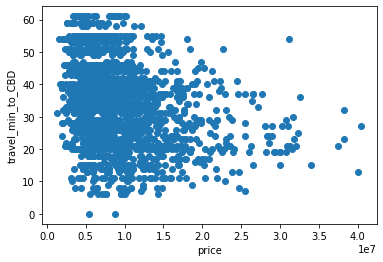

In [129]:
plt.scatter(price_prediction_df['price'], price_prediction_df['travel_min_to_CBD'])
plt.xlabel('price')
plt.ylabel('travel_min_to_CBD')

Text(0, 0.5, 'Distance_to_hospital')

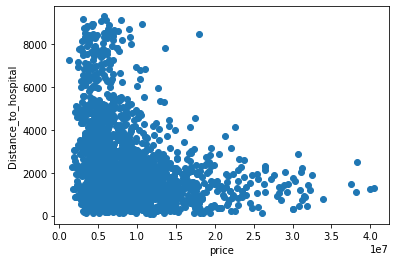

In [130]:
plt.scatter(price_prediction_df['price'], price_prediction_df['Distance_to_hospital'])
plt.xlabel('price')
plt.ylabel('Distance_to_hospital')

Text(0, 0.5, 'Distance_to_sc')

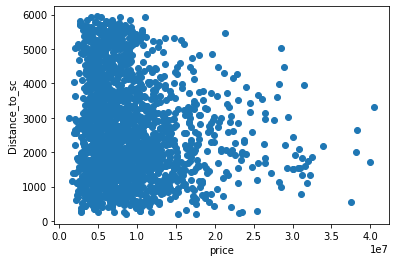

In [131]:
plt.scatter(price_prediction_df['price'], price_prediction_df['Distance_to_sc'])
plt.xlabel('price')
plt.ylabel('Distance_to_sc')

### Checking for Normality using histograms 

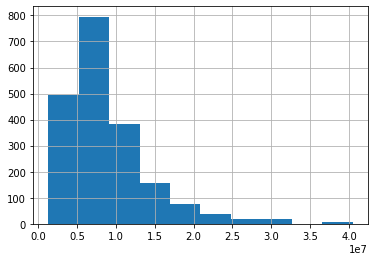

In [132]:
price_prediction_df['price'].hist()

'price' appears to be right skewed.

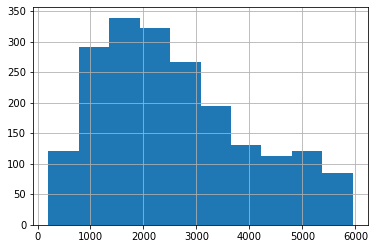

In [133]:
price_prediction_df['Distance_to_sc'].hist()

'Distance_to_sc' appears to be right skewed.

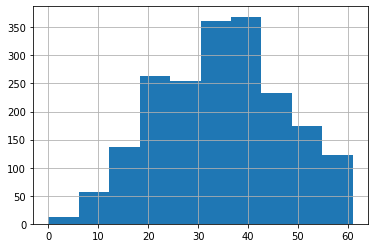

In [134]:
price_prediction_df['travel_min_to_CBD'].hist()

'travel_min_to_CBD' appears to be slightly left skewed.

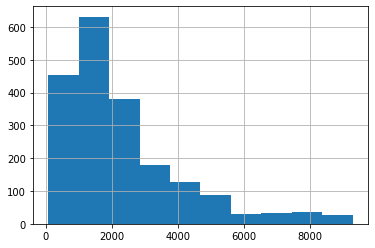

In [135]:
price_prediction_df['Distance_to_hospital'].hist()

'Distance_to_hospital' appears to be right skewed.

#### <span style="color:red"> Observations:

Firstly, none of the three predictor varaibles in use appeared to be strictly linearly realted to the predictor variable price. Secondly, except for 'travel_min_to_CBD' non of the other predictor variables appeared to be normaly distributed. This, however, can be changed by using various transformations techniques such as log and power transformations that can help normalize the distribution of a variable.

## 2.2 Applying different Transformation Techniques

### 2.2.A Normalising Distributions  - Check for a skew in the data

Data transformation is required if data does not fit a normal distribution. We seek to normalise the data and remove any kind of skewing. The best way of checking for a skew in the data is by ploting each predictor variable using histograms. As we have done above we can plot the each predictor to assess whether they require transformation.

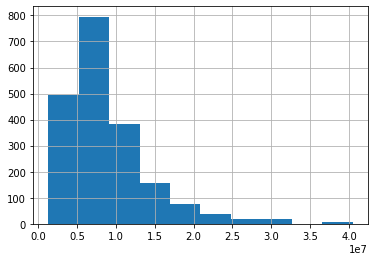

In [136]:
price_prediction_df['price'].hist()

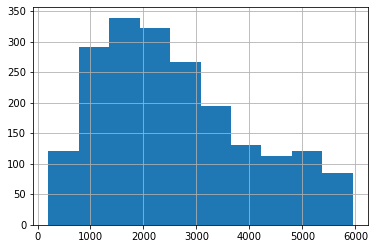

In [137]:
price_prediction_df['Distance_to_sc'].hist()

'Distance_to_sc' appears to be slightly right skewed.

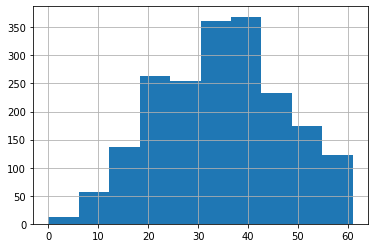

In [138]:
price_prediction_df['travel_min_to_CBD'].hist()

'travel_min_to_CBD' appears to be very slightly left skewed.

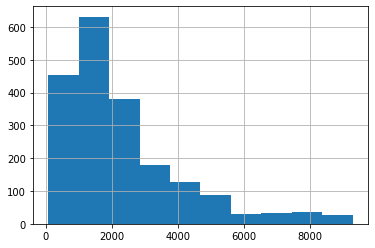

In [139]:
price_prediction_df['Distance_to_hospital'].hist()

'Distance_to_hospital appears to be severly right skewed.

Before transforming the data we need to find a transformation method to use. Common transformation methods include log, square root, power, and box-cox transformations. For right skewed data it is advised to apply log and square root transormations. We will apply the log and square root transormations to our 'Distance_to_sc' and 'Distance_to_hospital'variables. For left skewed data it is advised to apply power transformations with an exponent larger than one.

### Log transformation

In [140]:
# function to perform log transformation of a predictor 
def transformation_log(row):
    
    # log transformation
    log_row = math.log(row)
    
    # return transformed value
    return log_row 


In [141]:
# log transform Distance_to_hospital'
price_prediction_df['price_log'] = price_prediction_df.apply(lambda row: transformation_log(row['price']),axis=1)


# log transform Distance_to_hospital'
price_prediction_df['Distance_to_hospital_log'] = price_prediction_df.apply(lambda row: transformation_log(row['Distance_to_hospital']),axis=1)

# log transform 
price_prediction_df['Distance_to_sc_log'] = price_prediction_df.apply(lambda row: transformation_log(row['Distance_to_sc']),axis=1)



/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

### Square root transformation

In [142]:
def transformation_square_root(row):
    
    square_root_row = math.sqrt(row)
    
    return square_root_row

In [143]:
# Square root transformation transform 'travel_min_to_CBD'
price_prediction_df['Distance_to_sc_square_root'] = price_prediction_df.apply(lambda row: transformation_square_root(row['Distance_to_sc']),axis=1)


/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Power transformation

In [144]:
# function to perform squared power transformation of a predictor 
def transformation_power_2(row):
    
    # squared power transformation
    pow_row = math.pow(row,2)
    
    # return transformed value 
    return pow_row 


In [145]:
# square power transform 'travel_min_to_CBD'
price_prediction_df['travel_min_to_CBD_pow'] = price_prediction_df.apply(lambda row: (row['travel_min_to_CBD']),axis=1)


/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [146]:
price_prediction_df.describe()

,price,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price_log,Distance_to_hospital_log,Distance_to_sc_log,Distance_to_sc_square_root,travel_min_to_CBD_pow
count,1.985000e+03,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,8.876788e+06,2601.567254,34.553652,2300.482620,15.848361,7.434454,7.697236,49.067460,34.553652
std,5.399991e+06,1393.324349,12.475592,1831.569387,0.539306,0.828442,0.618440,13.930163,12.475592
min,1.300000e+06,206.000000,0.000000,81.000000,14.077875,4.394449,5.327876,14.352700,0.000000
25%,5.236000e+06,1509.000000,26.000000,1058.000000,15.471068,6.964136,7.319202,38.845849,26.000000
50%,7.502000e+06,2354.000000,35.000000,1779.000000,15.830680,7.483807,7.763871,48.518038,35.000000
75%,1.080000e+07,3511.000000,44.000000,2922.000000,16.195057,7.980024,8.163656,59.253692,44.000000
max,4.046000e+07,5950.000000,61.000000,9299.000000,17.515824,9.137662,8.691146,77.136243,61.000000


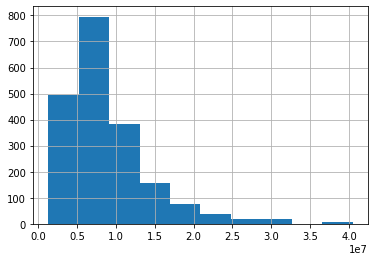

In [147]:
# BEFORE
price_prediction_df['price'].hist()

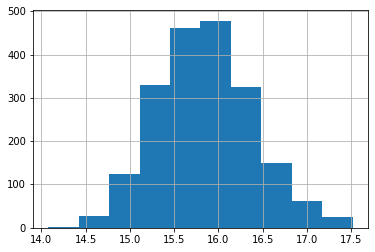

In [148]:
# AFTER
price_prediction_df['price_log'].hist()


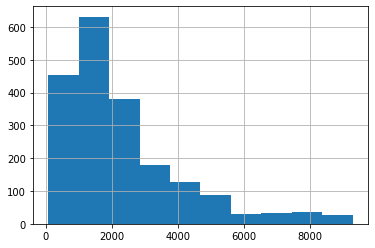

In [149]:
# BEFORE
price_prediction_df['Distance_to_hospital'].hist()


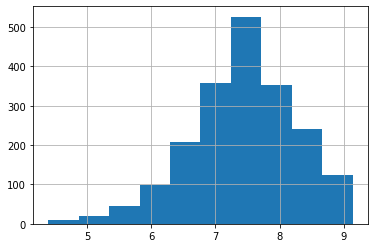

In [150]:
# AFTER
price_prediction_df['Distance_to_hospital_log'].hist()


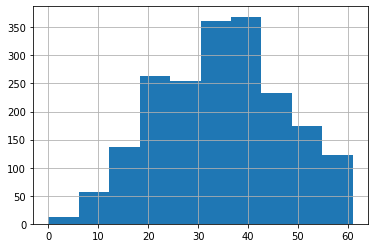

In [151]:

# BEFORE
price_prediction_df['travel_min_to_CBD'].hist()

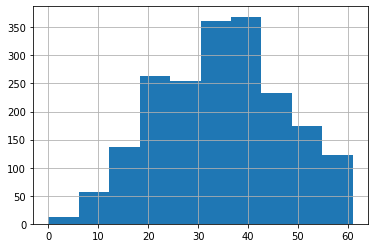

In [152]:
# AFTER
price_prediction_df['travel_min_to_CBD_pow'].hist()

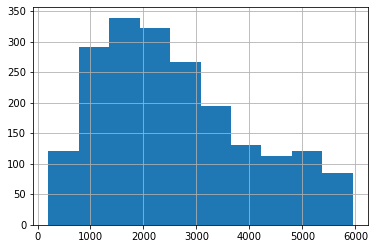

In [153]:
# BEFORE
price_prediction_df['Distance_to_sc'].hist()

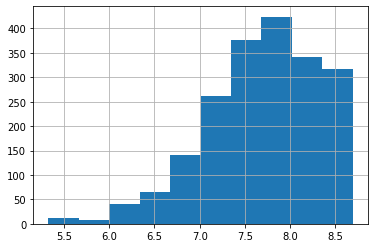

In [154]:
# AFTER
price_prediction_df['Distance_to_sc_log'].hist()

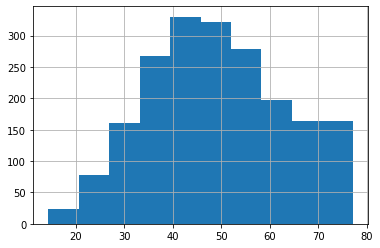

In [155]:
price_prediction_df['Distance_to_sc_square_root'].hist()

#### <span style="color:red"> Observations:

The above perform tarnsformations varied in their effectivness to transform skewed distribution into a more normalised format. 

The distribution of the predictor 'Distance_to_hospital' was severly right skewed. The log transforamtion helped to normalize its distribution.

The distribution of the predictor 'travel_min_to_CBD'had a slight left skew. None of the tested transforamtions were able to notebly normalize its distribution.

The distribution of the predictor 'Distance_to_sc' was right skewed. While the log transforamtion created a left skewed distribution, square root transformation helped to create a roughly normale distribution.



### 2.2.B Data "Scaling" - adusting the scale of predictor varibales 

### Z-Score Normalisation

For a z-score normalisation all variable values are converted to a z-scale.

In [156]:
# StandardScaler() methode enables us to apply a z-score normalisation to all
# three variables 'Distance_to_sc', 'travel_min_to_CBD', 'Distance_to_hospital'
std_scale = preprocessing.StandardScaler().fit(price_prediction_df[['Distance_to_sc', 'travel_min_to_CBD', 'Distance_to_hospital']])

# normalise the three variables 'Distance_to_sc', 'travel_min_to_CBD', 'Distance_to_hospital'
df_std = std_scale.transform(price_prediction_df[['Distance_to_sc', 'travel_min_to_CBD', 'Distance_to_hospital']])

In [157]:
# now assign the scaled variable values to a new column in our df price_prediction_df
price_prediction_df['Distance_to_sc_scaled'] = df_std[:,0]
price_prediction_df['travel_min_to_CBD_scaled'] = df_std[:,1]
price_prediction_df['Distance_to_hospital_scaled'] = df_std[:,2]

/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [158]:
# compare the result
price_prediction_df.describe()

,price,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price_log,Distance_to_hospital_log,Distance_to_sc_log,Distance_to_sc_square_root,travel_min_to_CBD_pow,Distance_to_sc_scaled,travel_min_to_CBD_scaled,Distance_to_hospital_scaled
count,1.985000e+03,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1.985000e+03,1.985000e+03,1.985000e+03
mean,8.876788e+06,2601.567254,34.553652,2300.482620,15.848361,7.434454,7.697236,49.067460,34.553652,1.114767e-16,2.870360e-16,7.908591e-17
std,5.399991e+06,1393.324349,12.475592,1831.569387,0.539306,0.828442,0.618440,13.930163,12.475592,1.000252e+00,1.000252e+00,1.000252e+00
min,1.300000e+06,206.000000,0.000000,81.000000,14.077875,4.394449,5.327876,14.352700,0.000000,-1.719751e+00,-2.770398e+00,-1.212098e+00
25%,5.236000e+06,1509.000000,26.000000,1058.000000,15.471068,6.964136,7.319202,38.845849,26.000000,-7.843418e-01,-6.858038e-01,-6.785414e-01
50%,7.502000e+06,2354.000000,35.000000,1779.000000,15.830680,7.483807,7.763871,48.518038,35.000000,-1.777258e-01,3.578669e-02,-2.847908e-01
75%,1.080000e+07,3511.000000,44.000000,2922.000000,16.195057,7.980024,8.163656,59.253692,44.000000,6.528716e-01,7.573771e-01,3.394215e-01
max,4.046000e+07,5950.000000,61.000000,9299.000000,17.515824,9.137662,8.691146,77.136243,61.000000,2.403802e+00,2.120381e+00,3.822012e+00


### MinMax Normalisation 

For a minmax normalisation all variables are converted to a scale of 0-1 (0 = minimum, 1= maximum).

In [159]:
# MinMaxScaler() methode enables us to apply a minmax normalisation normalisation to all
# three variables 'Distance_to_sc', 'travel_min_to_CBD', 'Distance_to_hospital'
minmax_scale = preprocessing.MinMaxScaler().fit(price_prediction_df[['Distance_to_sc', 'travel_min_to_CBD', 'Distance_to_hospital']])

df_minmax = minmax_scale.transform(price_prediction_df[['Distance_to_sc', 'travel_min_to_CBD', 'Distance_to_hospital']])

In [160]:
# now assign the scaled variable values to a new column in our df price_prediction_df
price_prediction_df['Distance_to_sc_minmax'] = df_minmax[:,0]
price_prediction_df['travel_min_to_CBD_minmax'] = df_minmax[:,1]
price_prediction_df['Distance_to_hospital_minmax'] = df_minmax[:,2]

/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [161]:
# compare variables 
price_prediction_df.describe()

,price,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price_log,Distance_to_hospital_log,Distance_to_sc_log,Distance_to_sc_square_root,travel_min_to_CBD_pow,Distance_to_sc_scaled,travel_min_to_CBD_scaled,Distance_to_hospital_scaled,Distance_to_sc_minmax,travel_min_to_CBD_minmax,Distance_to_hospital_minmax
count,1.985000e+03,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1.985000e+03,1.985000e+03,1.985000e+03,1985.000000,1985.000000,1985.000000
mean,8.876788e+06,2601.567254,34.553652,2300.482620,15.848361,7.434454,7.697236,49.067460,34.553652,1.114767e-16,2.870360e-16,7.908591e-17,0.417056,0.566453,0.240777
std,5.399991e+06,1393.324349,12.475592,1831.569387,0.539306,0.828442,0.618440,13.930163,12.475592,1.000252e+00,1.000252e+00,1.000252e+00,0.242570,0.204518,0.198695
min,1.300000e+06,206.000000,0.000000,81.000000,14.077875,4.394449,5.327876,14.352700,0.000000,-1.719751e+00,-2.770398e+00,-1.212098e+00,0.000000,0.000000,0.000000
25%,5.236000e+06,1509.000000,26.000000,1058.000000,15.471068,6.964136,7.319202,38.845849,26.000000,-7.843418e-01,-6.858038e-01,-6.785414e-01,0.226845,0.426230,0.105988
50%,7.502000e+06,2354.000000,35.000000,1779.000000,15.830680,7.483807,7.763871,48.518038,35.000000,-1.777258e-01,3.578669e-02,-2.847908e-01,0.373955,0.573770,0.184205
75%,1.080000e+07,3511.000000,44.000000,2922.000000,16.195057,7.980024,8.163656,59.253692,44.000000,6.528716e-01,7.573771e-01,3.394215e-01,0.575383,0.721311,0.308201
max,4.046000e+07,5950.000000,61.000000,9299.000000,17.515824,9.137662,8.691146,77.136243,61.000000,2.403802e+00,2.120381e+00,3.822012e+00,1.000000,1.000000,1.000000


Firstly, we can check the impact of the different data normalisation techniques on to the distribution/shape of the data. We will use 'Distance_to_sc' as an example.

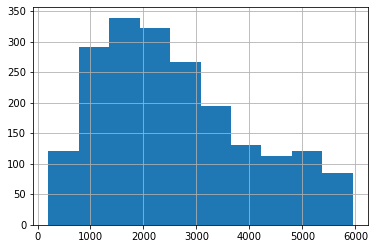

In [162]:
price_prediction_df['Distance_to_sc'].hist()

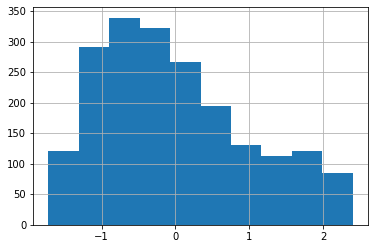

In [163]:
price_prediction_df['Distance_to_sc_scaled'].hist()

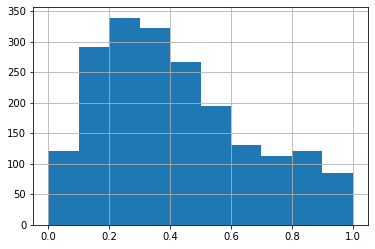

In [164]:
price_prediction_df['Distance_to_sc_minmax'].hist()

Both the z_score and min max normalisation did not change the shape of the distribution but only the scale of it. 

Secondly, we can check how the transformation of our predictor variables changed their scale. Improtant reminder, the z-Score and minmax normalisationtransformations didn't change the shape of a distribution but only the scale! Since the used dot-plots only support two variables (y and x axis) we need to create two plots. The largest difference in scale between the predictor variables was between 'travel_min_to_CBD' and 'Distance_to_sc', 'Distance_to_hospital'. Thus we first plot 'travel_min_to_CBD' with 'Distance_to_sc' and secondly, 'travel_min_to_CBD' with 'Distance_to_hospital'. Each plot compares the property data points in three different scales:

- without any transformations (meters & minutes)
- a z_score normalisation, all variables are converted to a z_scale 
- a MinMax noramlisation, all variables are converted to a scale of 0-1 (0 = minimum, 1= maximum)

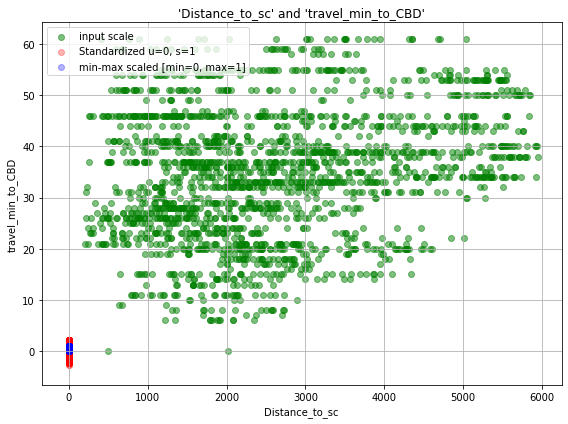

In [165]:
# Plot the original, standardised and normalised data values 
# of 'Distance_to_sc' and 'travel_min_to_CBD'
%matplotlib inline

from matplotlib import pyplot as plt

def plot():
    f = plt.figure(figsize=(8,6))

    plt.scatter(price_prediction_df['Distance_to_sc'], price_prediction_df['travel_min_to_CBD'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(price_prediction_df['Distance_to_sc_scaled'], price_prediction_df['travel_min_to_CBD_scaled'],  color='red',
             label='Standardized u=0, s=1', alpha=0.3) # can't print: μ = 0, σ = 0
    
    plt.scatter(price_prediction_df['Distance_to_sc_minmax'], price_prediction_df['travel_min_to_CBD_minmax'],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title("'Distance_to_sc' and 'travel_min_to_CBD'")
    plt.xlabel('Distance_to_sc')
    plt.ylabel('travel_min_to_CBD')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()
    f.savefig("z_min_max.pdf", bbox_inches='tight')

plot()
plt.show()

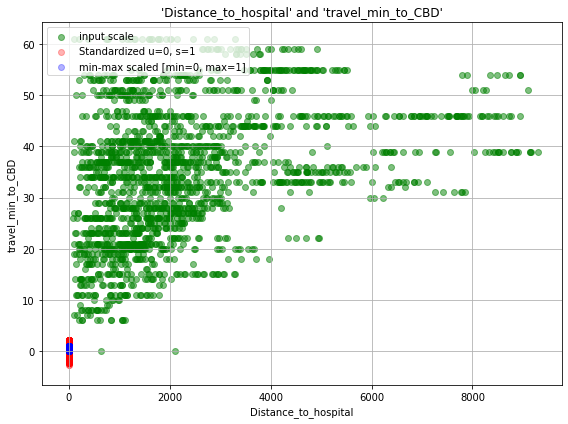

In [166]:
# Plot the original, standardised and normalised data values
# of 'Distance_to_hospital' and 'travel_min_to_CBD'
%matplotlib inline

from matplotlib import pyplot as plt

def plot():
    f = plt.figure(figsize=(8,6))

    plt.scatter(price_prediction_df['Distance_to_hospital'], price_prediction_df['travel_min_to_CBD'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(price_prediction_df['Distance_to_hospital_scaled'], price_prediction_df['travel_min_to_CBD_scaled'],  color='red',
             label='Standardized u=0, s=1', alpha=0.3) # can't print: μ = 0, σ = 0
    
    plt.scatter(price_prediction_df['Distance_to_hospital_minmax'], price_prediction_df['travel_min_to_CBD_minmax'],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title("'Distance_to_hospital' and 'travel_min_to_CBD'")
    plt.xlabel('Distance_to_hospital')
    plt.ylabel('travel_min_to_CBD')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()
    f.savefig("z_min_max.pdf", bbox_inches='tight')

plot()
plt.show()

#### <span style="color:red"> Observations:

Both plot show that the MinMax noramlisation was the most effective technique for adjusting the scale of the variables and reducing the 'spread' of the data points in blue.

This drastic scaling comes at a cost however, information loss. Particularly outliers are effect by the extreme scaling of fitting all the data on a 0-1 scale. Since the information loss is so great for  MinMax noramlisation, we will use z-score normalisation in this case, to maintaine some outliers.

### Apply Z-score normalisation to transformed predictors and target

Thus, to increase the accuracy of our model we will apply Z-score normalisation to our three predictor variables
'Distance_to_sc_square_root', 'travel_min_to_CBD', and 'Distance_to_hospital_log'.

In [167]:
# StandardScaler() methode enables us to apply a z-score normalisation to all
# three variables 'Distance_to_sc', 'travel_min_to_CBD', 'Distance_to_hospital'
std_scale = preprocessing.StandardScaler().fit(price_prediction_df[['Distance_to_sc_square_root', 'travel_min_to_CBD', 'Distance_to_hospital_log', 'price_log']])

# normalise the three variables 'Distance_to_sc', 'travel_min_to_CBD', 'Distance_to_hospital'
df_std = std_scale.transform(price_prediction_df[['Distance_to_sc_square_root', 'travel_min_to_CBD', 'Distance_to_hospital_log', 'price_log']])

In [168]:
# now assign the scaled variable values to a new column in our df price_prediction_df
price_prediction_df['Distance_to_sc_square_root_scaled'] = df_std[:,0]
price_prediction_df['travel_min_to_CBD_scaled'] = df_std[:,1]
price_prediction_df['Distance_to_hospital_log_scaled'] = df_std[:,2]
price_prediction_df['price_log_scaled'] = df_std[:,3]

/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/arminberger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

## 2.4 Final Check if predictors meet both the assumption of Linearity and Normality

### Linearity

Text(0, 0.5, 'Distance_to_sc_square_root_scaled')

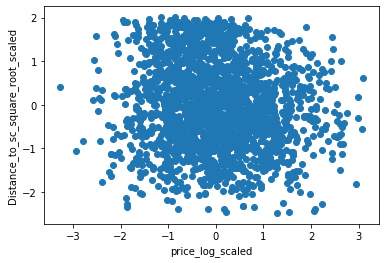

In [169]:
plt.scatter(price_prediction_df['price_log_scaled'], price_prediction_df['Distance_to_sc_square_root_scaled'])
plt.xlabel('price_log_scaled')
plt.ylabel('Distance_to_sc_square_root_scaled')

Text(0, 0.5, 'travel_min_to_CBD_scaled')

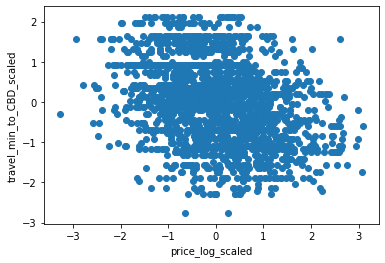

In [170]:
plt.scatter(price_prediction_df['price_log_scaled'], price_prediction_df['travel_min_to_CBD_scaled'])
plt.xlabel('price_log_scaled')
plt.ylabel('travel_min_to_CBD_scaled')

Text(0, 0.5, 'Distance_to_hospital_log_scaled')

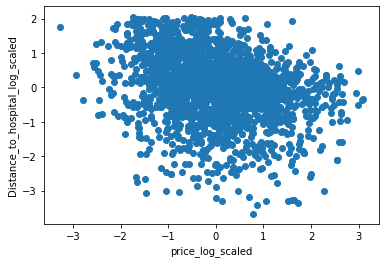

In [171]:
plt.scatter(price_prediction_df['price_log_scaled'], price_prediction_df['Distance_to_hospital_log_scaled'])
plt.xlabel('price_log_scaled')
plt.ylabel('Distance_to_hospital_log_scaled')

Observing the scatter plots we can see a negative linear relationship between the predictors 'Distance_to_sc_square_root', 'travel_min_to_CBD', 'Distance_to_hospital_log' and the target'price_log'.

### Normality

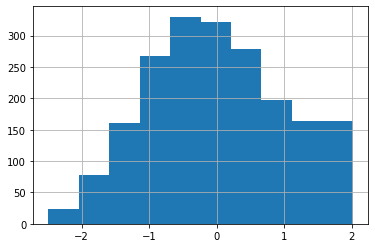

In [172]:
price_prediction_df['Distance_to_sc_square_root_scaled'].hist()

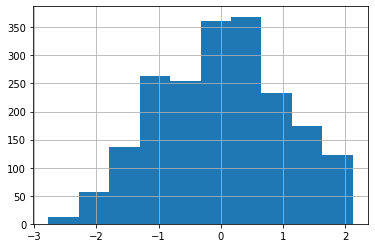

In [173]:
price_prediction_df['travel_min_to_CBD_scaled'].hist()

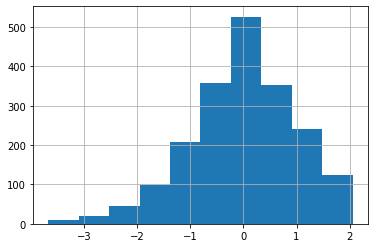

In [174]:
price_prediction_df['Distance_to_hospital_log_scaled'].hist()

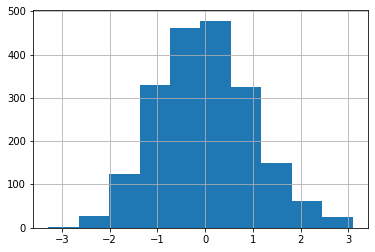

In [175]:
price_prediction_df['price_log_scaled'].hist()

After the transformations the predictors 'Distance_to_sc_square_root', 'travel_min_to_CBD', 'Distance_to_hospital_log' and the target'price_log'Normality are roughly normaly distributed.

## 2.5 Regression Model - predict the price of a property

After transforming our predictors to meet the Linearity and Normality assumptions we could use them to build a regression model and seek to predict the price of a property.

# Summary

In summary, I have been able to read in data in various formats and save them in a standardized pandas dataframe format. This required information was then megered into one dataframe which was written to a csv file 26255367_A3_solution.csv. Moreover, using that data and applying transformation techniques to it we were able to predict the likely price of a property.

Task 1:

- Firstly, we a multitude of different libraries that are required for our wrangling process.
    
- Secondly, we parsed the json and xml file and merge the two dataframes to get the basic information of each property.

- Thridly, we read in all the additional data provided on hospitals, shopping centers, supermarkets and train stations. This lat,lng information is then used to calculate the distance to each of these facilities from each property.

- Fourthly, we read in the shape data provided for each suburb and based on that calculate the suburb in which each property is located.

- Fifth, we use the GTFS data of Melbournes public train network in order to calaculate the travel time to CBD from the closest station. 

Task 2:

- Firstly, understand features and the distribution of the predictor variables in use. Based on that choose which transformation steps are required. 


The main take away from this assignmnet for me was understanding the realtionship between different dataframes and how they relate to another.

## References

- For Task 2 I applied a lot of the tutorial material code, particularly tutorial week 11

- For Task 1, particularly the train gtfs data and shape data I needed to read a lot of extra material to understand the format of the data

- Throughout Task 1 I applied a lot of the techniques already used in assignment 2

- Moreover, I used general documentation for libraries and python

https://docs.python.org/3/

https://pandas.pydata.org/docs/

https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

https://developers.google.com/transit/gtfs/reference#tripstxt

https://discover.data.vic.gov.au/dataset/ptv-timetable-and-geographic-information-2015-gtfs

https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula

https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html

https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg

https://discover.data.vic.gov.au/dataset/ptv-timetable-and-geographic-information-2015-gtfs